In [1]:
import os
import gensim
from gensim.models import Word2Vec
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt
import numpy as np

'''
	The following is for training the Word2Vec model
    after data augmentation
'''
folders1 = ['./corpus/training_set', './corpus/swapped_training_set']
word_lines1 = []

for corpus_folder in folders1:
    texts1 = os.listdir(corpus_folder)
    for file in texts1:
        print(file)
        with open(os.path.join(corpus_folder, file), 'r') as f:
            lines = f.readlines()
            lines = [i.rstrip('\n') for i in lines]
            word_lines1 += lines

word_lines_split1 = [''.join(word_lines1[i]).split() for i in range(len(word_lines1))]

#ADJUST THESE PARAMETERS
print('Training the model...')
corpus_model1 = Word2Vec(word_lines_split1, sg=1, size=100, window=15, negative=10, ns_exponent=0.75, min_count=1, workers=4)
print('Successfully trained the model')

slice04
slice05
slice04_swapped.txt
slice05_swapped.txt
Training the model...
Successfully trained the model


In [2]:
'''
	The following is for evaluating the model
    after the data augmentation
'''
occupations1 = []
with open('./occupations/occupations.txt', 'r') as reader:
    occupations1 = reader.readlines()
occupations1 = [occ.rstrip('\n') for occ in occupations1]
df1 = pd.DataFrame(columns=['occupations'])
df1['occupations'] = occupations1

corpus_vocab_dict1 = corpus_model1.wv.vocab
vocabs1 = list(corpus_vocab_dict1.keys())
df_filtered1 = df1.loc[(df1['occupations'].isin(vocabs1))]
occupations1 = df_filtered1['occupations'].tolist()

occupation_freq1 = {}
for line in word_lines_split1:
    for word in line:
        if word in occupation_freq1:
            occupation_freq1[word] += 1
        elif word in occupations1:
            occupation_freq1[word] = 1       

In [3]:
#This is to pair each occupation with its frequency
# print(len(occupation_freq1))
# print(df_filtered1.size)
df_filtered1.sort_values(by='occupations', inplace=True)
occupation_freq1 = list(occupation_freq1.items())
occupation_freq1.sort(key=lambda tpl: tpl[0])
# for i in range(len(df_filtered1) - len(occupation_freq1)):
#     occupation_freq1.append(('N/A', 0))
df_filtered1['occ_freq'] = [tpl[1] for tpl in occupation_freq1]
occupations1 = df_filtered1['occupations'].tolist()

/home/alejandrlopez/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/alejandrlopez/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [4]:
print('\nEvaluating the model..')
dir = './names/docs/'
titles1 = ['wn', 'bn']
files1 = os.listdir(dir)
for i in range(len(files1) // 2):
    #This is to combine the list of first names and the list of last names for each race
    with open(dir + files1[i], 'r') as f1, open(dir + files1[i+2], 'r') as f2:
        names1 = f1.readlines()
        names1 += f2.readlines()
    names1 = [name.rstrip('\n') for name in names1]
    average_cos_sims1 = []
    names1 = list(filter(lambda name: name in vocabs1, names1))
    for occ in occupations1:
        cosines1 = []
        for name in names1:
            cosines1.append(corpus_model1.wv.similarity(occ, name))
        average_cos_sims1.append(mean(cosines1))
    df_filtered1[titles1[i]] = average_cos_sims1
df_filtered1['wn'] = df_filtered1['wn'].apply(np.log)
df_filtered1['bn'] = df_filtered1['bn'].apply(np.log)
print('Successfully evaluated the model')


Evaluating the model..


/home/alejandrlopez/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Successfully evaluated the model


/home/alejandrlopez/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/alejandrlopez/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/home/alejandrlopez/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


        occupations  occ_freq        wn        bn
1199        general     15812 -0.696719 -0.653174
49302     president     13072 -0.908648 -0.872602
14248          king     10781 -0.493880 -0.451335
41356          army      9242 -0.895116 -0.865428
43761          star      9144 -0.935103 -0.863604
...             ...       ...       ...       ...
7411        copyist         2 -0.704072 -0.651953
10676  consolidator         2 -0.710425 -0.657097
71439   conciliator         2 -0.664469 -0.615373
56578       patcher         2 -0.683596 -0.619074
38920          dbas         2 -0.695324 -0.653256

[645 rows x 4 columns]


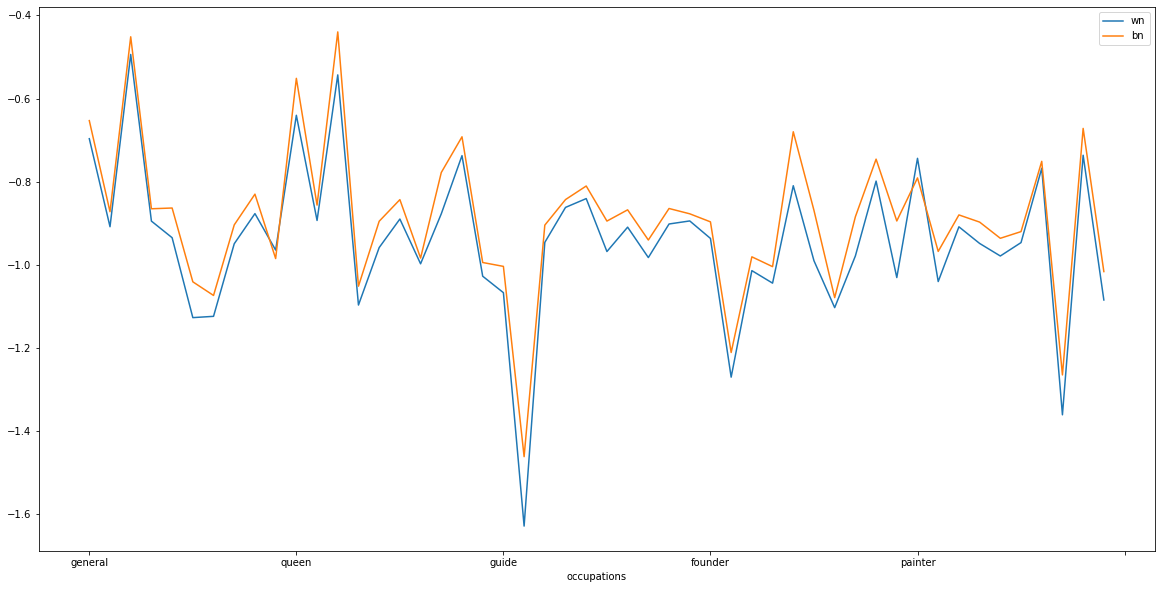

In [5]:
df_filtered1.sort_values(by='occ_freq', ascending=False, inplace=True)
print(df_filtered1)
df_filtered1.head(50).plot(x='occupations', y=['wn', 'bn'], figsize=(20,10))

In [6]:
'''
	The following is for training the Word2Vec model
    before data augmentation
'''

folders2 = ['./corpus/training_set']
word_lines2 = []

for corpus_folder in folders2:
    texts2 = os.listdir(corpus_folder)
    for file in texts2:
        print(file)
        with open(os.path.join(corpus_folder, file), 'r') as f:
            lines2 = f.readlines()
            lines2 = [i.rstrip('\n') for i in lines]
            word_lines2 += lines2

word_lines_split2 = [''.join(word_lines2[i]).split() for i in range(len(word_lines2))]

#ADJUST THESE PARAMETERS
print('Training the model...')
corpus_model2 = Word2Vec(word_lines_split2, sg=1, size=100, window=15, negative=10, ns_exponent=0.75, min_count=1, workers=4)
print('Successfully trained the model')

slice04
slice05
Training the model...
Successfully trained the model


In [7]:
'''
    The following is for evaluating the model
    before the data augmentation
'''
occupations2 = []
with open('./occupations/occupations.txt', 'r') as reader:
    occupations2 = reader.readlines()
occupations2 = [occ.rstrip('\n') for occ in occupations2]
df2 = pd.DataFrame(columns=['occupations'])
df2['occupations'] = occupations2

corpus_vocab_dict2 = corpus_model2.wv.vocab
vocabs2 = list(corpus_vocab_dict2.keys())
df_filtered2 = df2.loc[(df2['occupations'].isin(vocabs2))]
occupations2 = df_filtered2['occupations'].tolist()

occupation_freq2 = {}
for line in word_lines_split2:
    for word in line:
        if word in occupation_freq2:
            occupation_freq2[word] += 1
        elif word in occupations2:
            occupation_freq2[word] = 1    

In [8]:
df_filtered2.sort_values(by='occupations', inplace=True)
occupation_freq2 = list(occupation_freq2.items())
occupation_freq2.sort(key=lambda tpl: tpl[0])
# for i in range(len(df_filtered2) - len(occupation_freq2)):
#     occupation_freq2.append(('N/A', 0))
df_filtered2['occ_freq'] = [tpl[1] for tpl in occupation_freq2] 
occupations2 = df_filtered1['occupations'].tolist()

/home/alejandrlopez/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/alejandrlopez/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
print('\nEvaluating the model..')
dir = './names/docs/'
titles2 = ['wn', 'bn']
files2 = os.listdir(dir)
for i in range(len(files2) // 2):
    #This is to combine the list of first names and the list of last names for each race
    with open(dir + files2[i], 'r') as f1, open(dir + files2[i+2], 'r') as f2:
        print(files2[i])
        print(files2[i+2])
        names2 = f1.readlines()
        names2 += f2.readlines()
    names2 = [name.rstrip('\n') for name in names2]
    average_cos_sims2 = []
    names2 = list(filter(lambda name: name in vocabs2, names2))
    for occ in occupations2:
        cosines2 = []
        for name in names2:
            if occ in corpus_vocab_dict2:
                cosines2.append(corpus_model2.wv.similarity(occ, name))
        if len(cosines2) != 0:
            average_cos_sims2.append(mean(cosines2))
            
    print(df_filtered2.size)
    print(len(average_cos_sims2))
    df_filtered2[titles2[i]] = average_cos_sims2
df_filtered2['wn'] = df_filtered2['wn'].apply(np.log)
df_filtered2['bn'] = df_filtered2['bn'].apply(np.log)
print('Successfully evaluated the model')


Evaluating the model..
1wfn.txt
3wln.txt
1032
516
2bfn.txt
4bln.txt


/home/alejandrlopez/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1548
516
Successfully evaluated the model


/home/alejandrlopez/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/alejandrlopez/.local/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
df_filtered2.sort_values(by='occ_freq', ascending=False, inplace=True)
occ_list = list(df_filtered2['occupations'])
print(df_filtered2)
#df_filtered2.head(50).plot(x='occupations', y=['wn', 'bn'], figsize=(20,10))
df_filtered1.reset_index(drop=True, inplace=True)

      occupations  occ_freq        wn        bn
1199      general      7238 -0.776300 -0.732397
43761        star      6540 -0.883578 -0.841396
41356        army      4236 -0.958330 -0.944228
49302   president      4192 -0.974087 -0.930247
26935      player      2976 -1.023434 -0.962772
...           ...       ...       ...       ...
29987     lineman         2 -0.860555 -0.886467
30551     loaders         2 -0.748262 -0.716046
47214   locksmith         2 -1.527420 -1.598222
8834       logger         2 -0.875197 -0.956996
14996   zookeeper         2 -0.696591 -0.667100

[516 rows x 4 columns]


/home/alejandrlopez/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


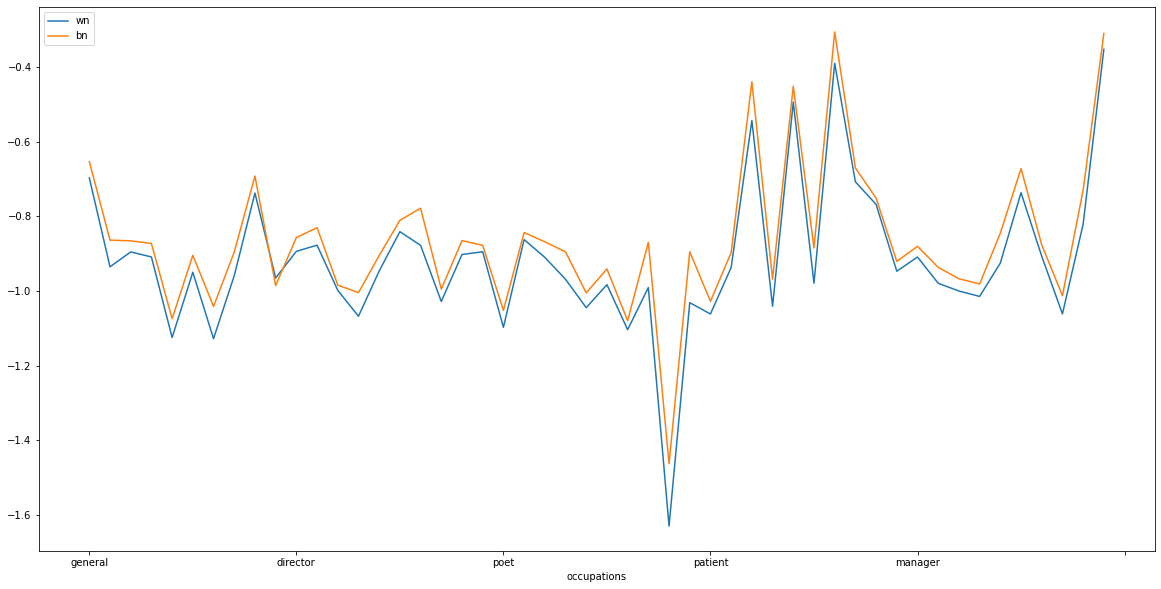

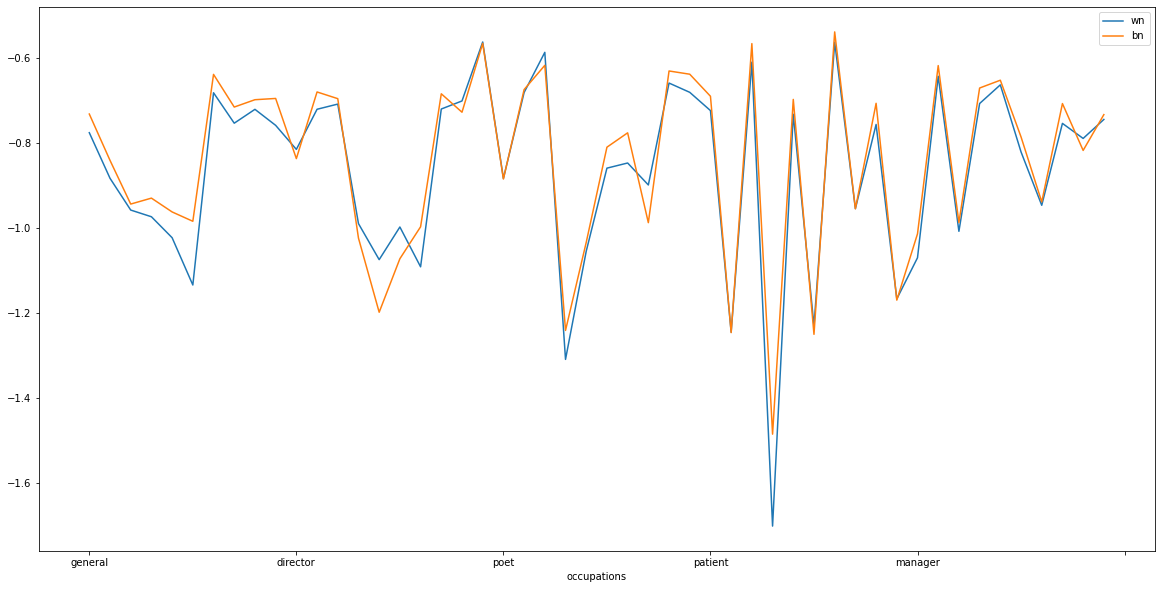

In [11]:
rows = []
output = pd.DataFrame(columns=['occupations', 'occ_freq', 'wn', 'bn'])
for i in range(len(df_filtered1.index)):
    rows.append(df_filtered1.iloc[[i]])
df_filtered1_ordered = pd.DataFrame(columns=['occupations', 'occ_freq', 'wn', 'bn'])
for occ in occ_list:
    for i, row in enumerate(rows):
        if row.at[i, 'occupations'] == occ:
            df_filtered1_ordered = df_filtered1_ordered.append(row.iloc[0])
df_filtered1_ordered.head(50).plot(x='occupations', y=['wn', 'bn'], figsize=(20,10))
df_filtered2.head(50).plot(x='occupations', y=['wn', 'bn'], figsize=(20,10))

In [12]:
model1_cos_sims_wn = list(df_filtered1['wn'])
model1_cos_sims_bn = list(df_filtered1['bn'])
model1_diff = mean([num1 - num2 for num1, num2 in zip(model1_cos_sims_wn, model1_cos_sims_bn)])
print('The average difference for the cosine similarities between the races for the augmented model is: ', model1_diff)

model2_cos_sims_wn = list(df_filtered2['wn'])
model2_cos_sims_bn = list(df_filtered2['bn'])
model2_diff = mean([num1 - num2 for num1, num2 in zip(model2_cos_sims_wn, model2_cos_sims_bn)])
print('The average difference for the cosine similarities between the races for the un-augmented model is: ', model2_diff)

The average difference for the cosine similarities between the races for the augmented model is:  -0.049600624788178255
The average difference for the cosine similarities between the races for the un-augmented model is:  -0.02965255183031751


In [26]:
df_filtered1.sort_values(by='wn', ascending=False, inplace=True)
print(df_filtered1)

      occupations  occ_freq        wn        bn
113         miner       245 -0.311660 -0.332892
91      carpenter       340 -0.317666 -0.340620
70           dean       662 -0.333492 -0.337627
66         parker       755 -0.352251 -0.310080
80          baker       471 -0.361971 -0.396461
..            ...       ...       ...       ...
270           cns        22 -1.547516 -1.482627
191    classifier        62 -1.556529 -1.457406
185           dba        64 -1.572756 -1.476522
21         server      2306 -1.629446 -1.462256
192  disassembler        60 -1.787293 -1.619635

[645 rows x 4 columns]


/home/alejandrlopez/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
